## Florestas Aleatórias

**Florestas Aleatórias**

*Autor: Danillo de Souza*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('dataframes/Social_Network_Ads.csv', sep=',')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Preparando os Dados**

In [3]:
del df['User ID']

In [4]:
idCat, cat = pd.factorize(df['Gender'])
df['GenderCat'] = idCat 
# Male = 0 / Female = 1

df.head()

,Gender,Age,EstimatedSalary,Purchased,GenderCat
0,Male,19,19000,0,0
1,Male,35,20000,0,0
2,Female,26,43000,0,1
3,Female,27,57000,0,1
4,Male,19,76000,0,0


In [5]:
del df['Gender']
df.head()

,Age,EstimatedSalary,Purchased,GenderCat
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


**Análise Exploratória**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   GenderCat        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased,GenderCat
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


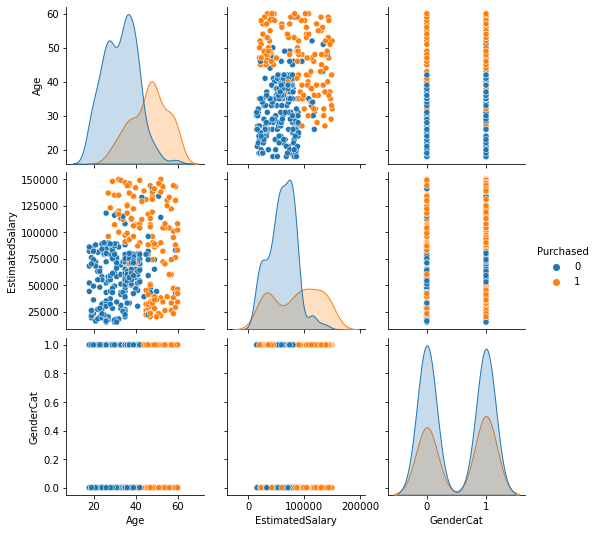

In [8]:
sns.pairplot(df, hue='Purchased')

<AxesSubplot:>

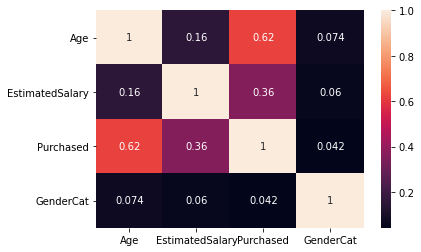

In [9]:
sns.heatmap(df.corr(), annot=True)

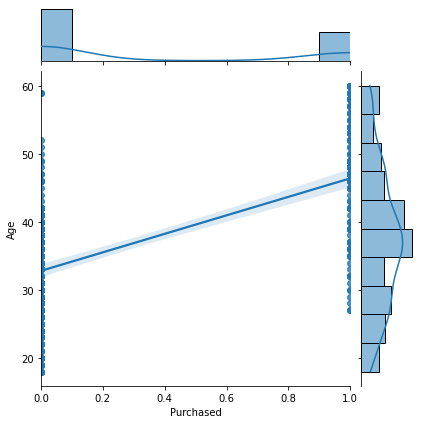

In [10]:
sns.jointplot(x='Purchased', y='Age', data=df, kind='reg')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

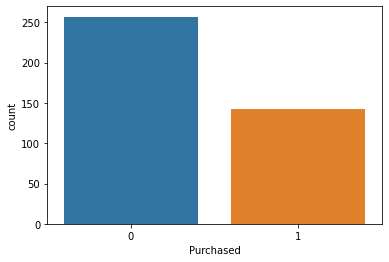

In [11]:
sns.countplot(x='Purchased', data=df)

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

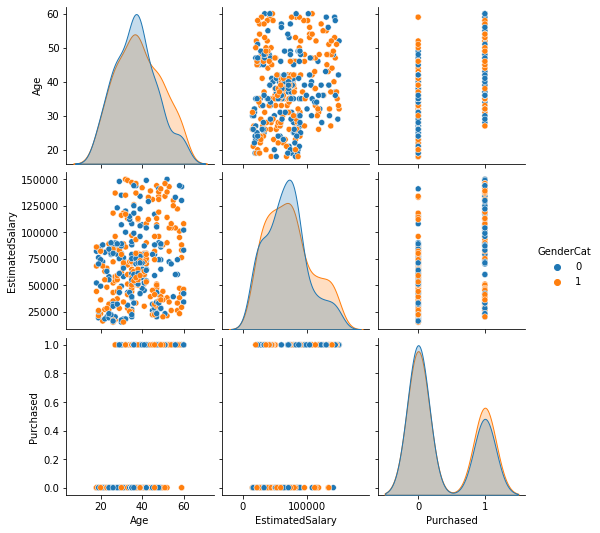

In [13]:
sns.pairplot(df, hue='GenderCat')

**Divisão dos Dados em Treino e Teste**

In [14]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [15]:
X_test.shape

(80, 3)

**Escolhendo o melhores hiperparâmetros**

In [16]:
params = [
    {
        "max_depth":[4,8,12],
        "max_features":[1,2,3],
        "min_samples_leaf":[4,8,12],
        "min_samples_split":[4,8,12]        
    }
]

modelo_floresta = RandomForestClassifier(max_depth=4,max_features=3,min_samples_leaf=8,min_samples_split=12)
# grid_search = GridSearchCV(modelo_floresta, params, cv=5)
# grid_search.fit(X_train, Y_train)
# grid_search.best_params_

**Ajustando e fazendo Previsões**

In [17]:
modelo_floresta.fit(X_train,Y_train)
pred = modelo_floresta.predict(X_test)
pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
Y_test[:10]

248    0
318    1
173    0
285    1
184    0
235    1
124    0
282    1
151    0
169    0
Name: Purchased, dtype: int64

**Verificando Desempenho do algoritmo**

In [19]:
modelo_floresta.score(X_test,Y_test)

0.9125

In [20]:
cross = cross_val_score(modelo_floresta, X_test, Y_test, cv=10, scoring='accuracy')
final = sum(cross) / len(cross)
final

0.8875

In [21]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.90      0.87      0.89        31

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80



In [22]:
print(confusion_matrix(Y_test,pred))

[[46  3]
 [ 4 27]]


**Testando com novos Dados**

In [23]:
newX = pd.DataFrame([
    [48,29000,0]
],columns=X.columns)
pred2 = modelo_floresta.predict(newX)
pred2

array([1], dtype=int64)